In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('fligh-data-clean.csv', index_col=0)
df_booked = df[df['flights booked'] > 0]

1. ¿Cómo se distribuye la cantidad de vuelos reservados por mes durante el año?

> En ambos años se observan tendencias similares, con julio como el mes con más vuelos, seguido de diciembre.

Text(0.5, 1.0, 'Vuelos reservados en 2017 y 2018')

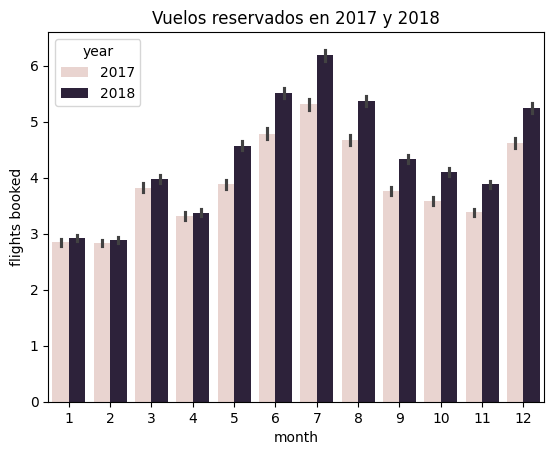

In [9]:
sns.barplot(x='month',
             hue = 'year',
             y='flights booked',
             data=df)
plt.title('Vuelos reservados en 2017 y 2018')

2. ¿Existe una relación entre la distancia de los vuelos y los puntos acumulados por los clientes?

<Axes: xlabel='distance', ylabel='points accumulated'>

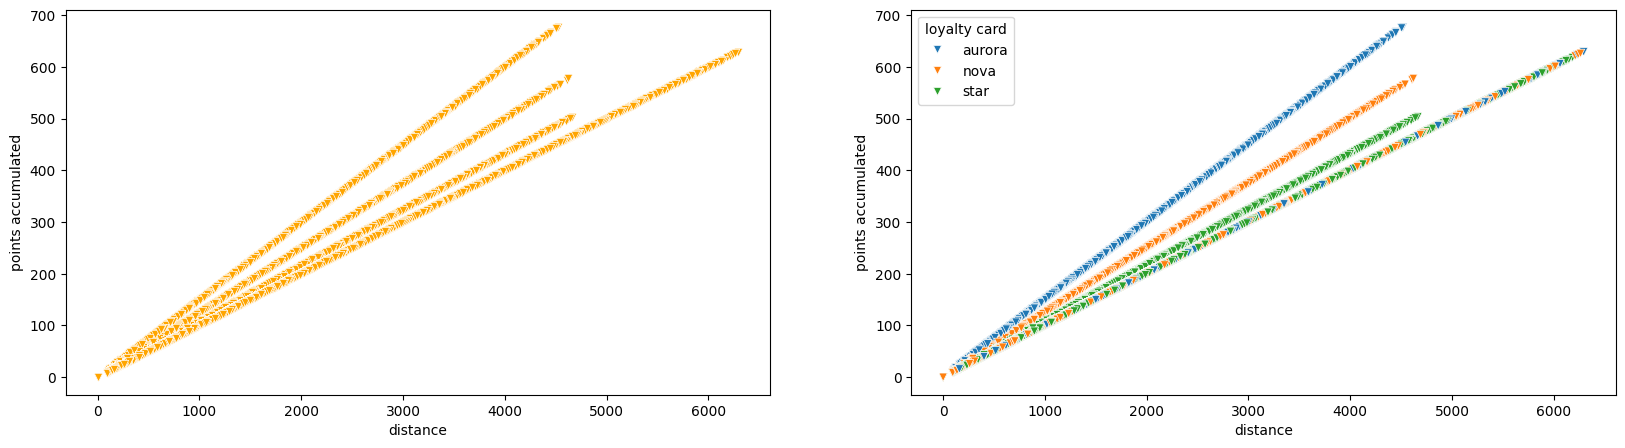

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))

sns.scatterplot(x='distance',
                y= 'points accumulated',
                data = df,
                marker='v',
                color = 'orange',
                ax=axes[0])

sns.scatterplot(x='distance',
                y= 'points accumulated',
                data = df,
                hue = 'loyalty card',
                marker='v',
                ax=axes[1])

> Son proporcionales, aunque a diferentes escalas. Parece indicar que, según alguna subagrupación como puede ser el grado de loyalty, se otorgan diferentes puntos por distancia.

3. ¿Cuál es la distribución de los clientes por provincia o estado?


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'alberta'),
  Text(1, 0, 'ontario'),
  Text(2, 0, 'british columbia'),
  Text(3, 0, 'saskatchewan'),
  Text(4, 0, 'quebec'),
  Text(5, 0, 'newfoundland'),
  Text(6, 0, 'manitoba'),
  Text(7, 0, 'new brunswick'),
  Text(8, 0, 'nova scotia'),
  Text(9, 0, 'prince edward island'),
  Text(10, 0, 'yukon')])

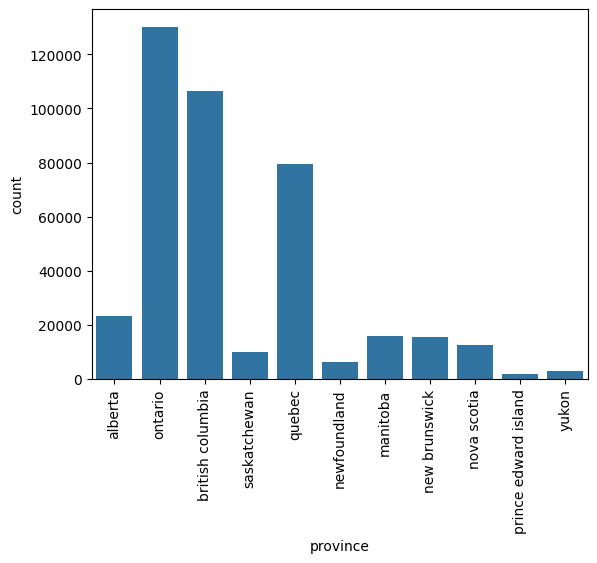

In [21]:
sns.countplot(x='province',
              data=df)
plt.xticks(rotation = 90)

In [22]:
for provincia in df['province'].unique():
    if provincia in ['ontario', 'british columbia', 'quebec']:
        print(f'Clientes de {provincia}:', (df['province'] == provincia).sum())


Clientes de ontario: 130258
Clientes de british columbia: 106442
Clientes de quebec: 79549


> Ontario parece ser la provincia donde hay mayor cantidad de afiliados a la aerolínea, con British Columbia y Quebec a una distancia considerable, pero aun así superior al resto de provincias. 

4. ¿Cómo se compara el salario promedio entre los diferentes niveles educativos de los clientes?

<Axes: xlabel='salary', ylabel='education'>

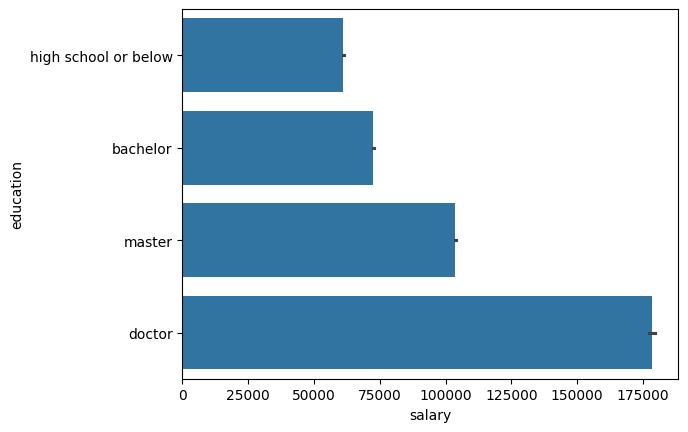

In [23]:
sns.barplot(y='education',
            x='salary',
            data=df[df['education']!='college'],
            order=['high school or below', 'bachelor', 'master', 'doctor'])

> tenemos también la categoría 'college', no obstante, no tenemos datos de salario de los usuarios pertenecientes a ese grupo. El salario aumenta en consonancia al nivel educativo; es decir, los de estudiantes de instituto los sueldos son más bajos que los de doctorados. Hay significativas diferencias en el promedio salarial entre bachelor y master, así como entre master y doctor. Podríamos asumir que los sueldos de college estarían entre high school y bachelor.

In [24]:
df.columns

Index(['loyalty number', 'year', 'month', 'flights booked',
       'flights with companions', 'total flights', 'distance',
       'points accumulated', 'points redeemed', 'dollar cost points redeemed',
       'country', 'province', 'city', 'postal code', 'gender', 'education',
       'salary', 'marital status', 'loyalty card', 'clv', 'enrollment type',
       'enrollment year', 'enrollment month'],
      dtype='object')

5. ¿Cuál es la proporción de clientes con diferentes tipos de tarjetas de fidelidad?

In [54]:
df_pie = pd.DataFrame(df.groupby('loyalty card')['loyalty number'].count().reset_index())
df_pie

,loyalty card,loyalty number
0,aurora,83132
1,nova,136883
2,star,183721


([<matplotlib.patches.Wedge at 0x2418ab87ed0>,
 [Text(0.91766653141785, 0.693100380259261, 'aurora'),
  Text(-0.8153528007739611, 0.8109869359429025, 'nova'),
  Text(0.16184918398805825, -1.138553837832186, 'star')],
 [Text(1.037362165950613, 0.783504777684382, '20.6%'),
  Text(-0.9217031660923037, 0.9167678406311072, '33.9%'),
  Text(0.18295994711693542, -1.2870608601581233, '45.5%')])

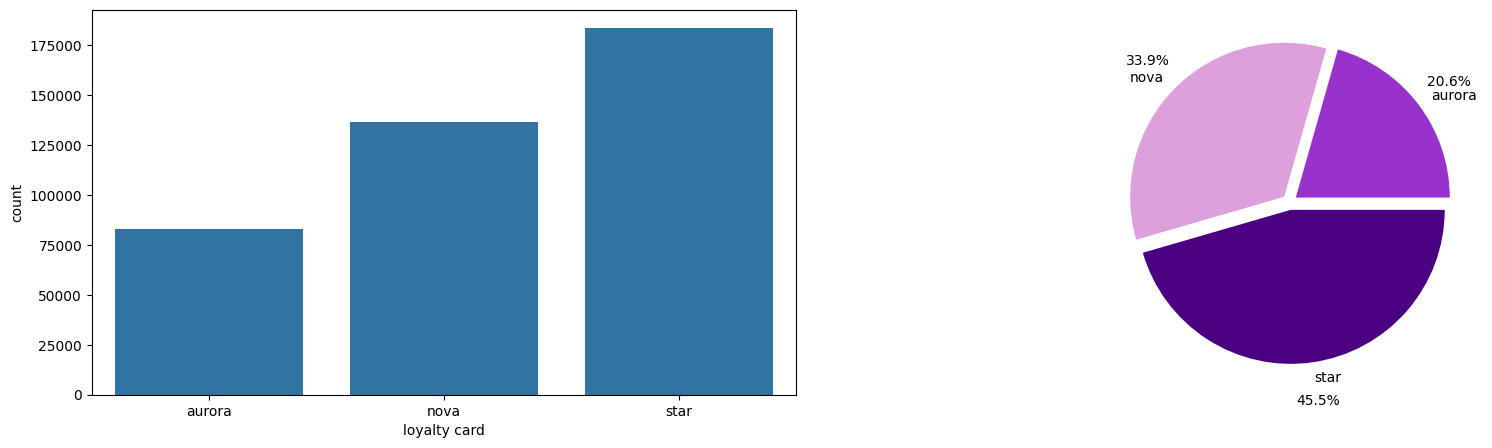

In [59]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 5))
sns.countplot(x='loyalty card',
            data=df,
            ax=axes[0])

plt.pie(x= df_pie['loyalty number'], 
       autopct='%1.1f%%',
       pctdistance=1.25,
       labels = df_pie['loyalty card'],
       explode = (0.05,0.05,0.05),
       colors = ['darkorchid', 'plum', 'indigo'])

> Star es la categoría que más clientes recoge. 

6. ¿Cómo se distribuyen los clientes según su estado civil y género?


<Axes: xlabel='marital status', ylabel='count'>

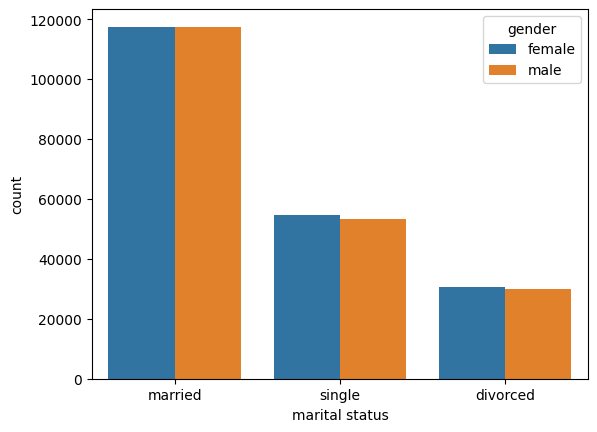

In [ ]:
sns.countplot(x='marital status',
              hue = 'gender',
              data = df)

> No podemos hablar de una diferencia significativa en cuanto a género según el estado civil

# Otros

1. Vuelos reservados por los clientes afiliados a la aerolínea

Text(0.5, 1.0, 'Vuelos realizados (2018)')

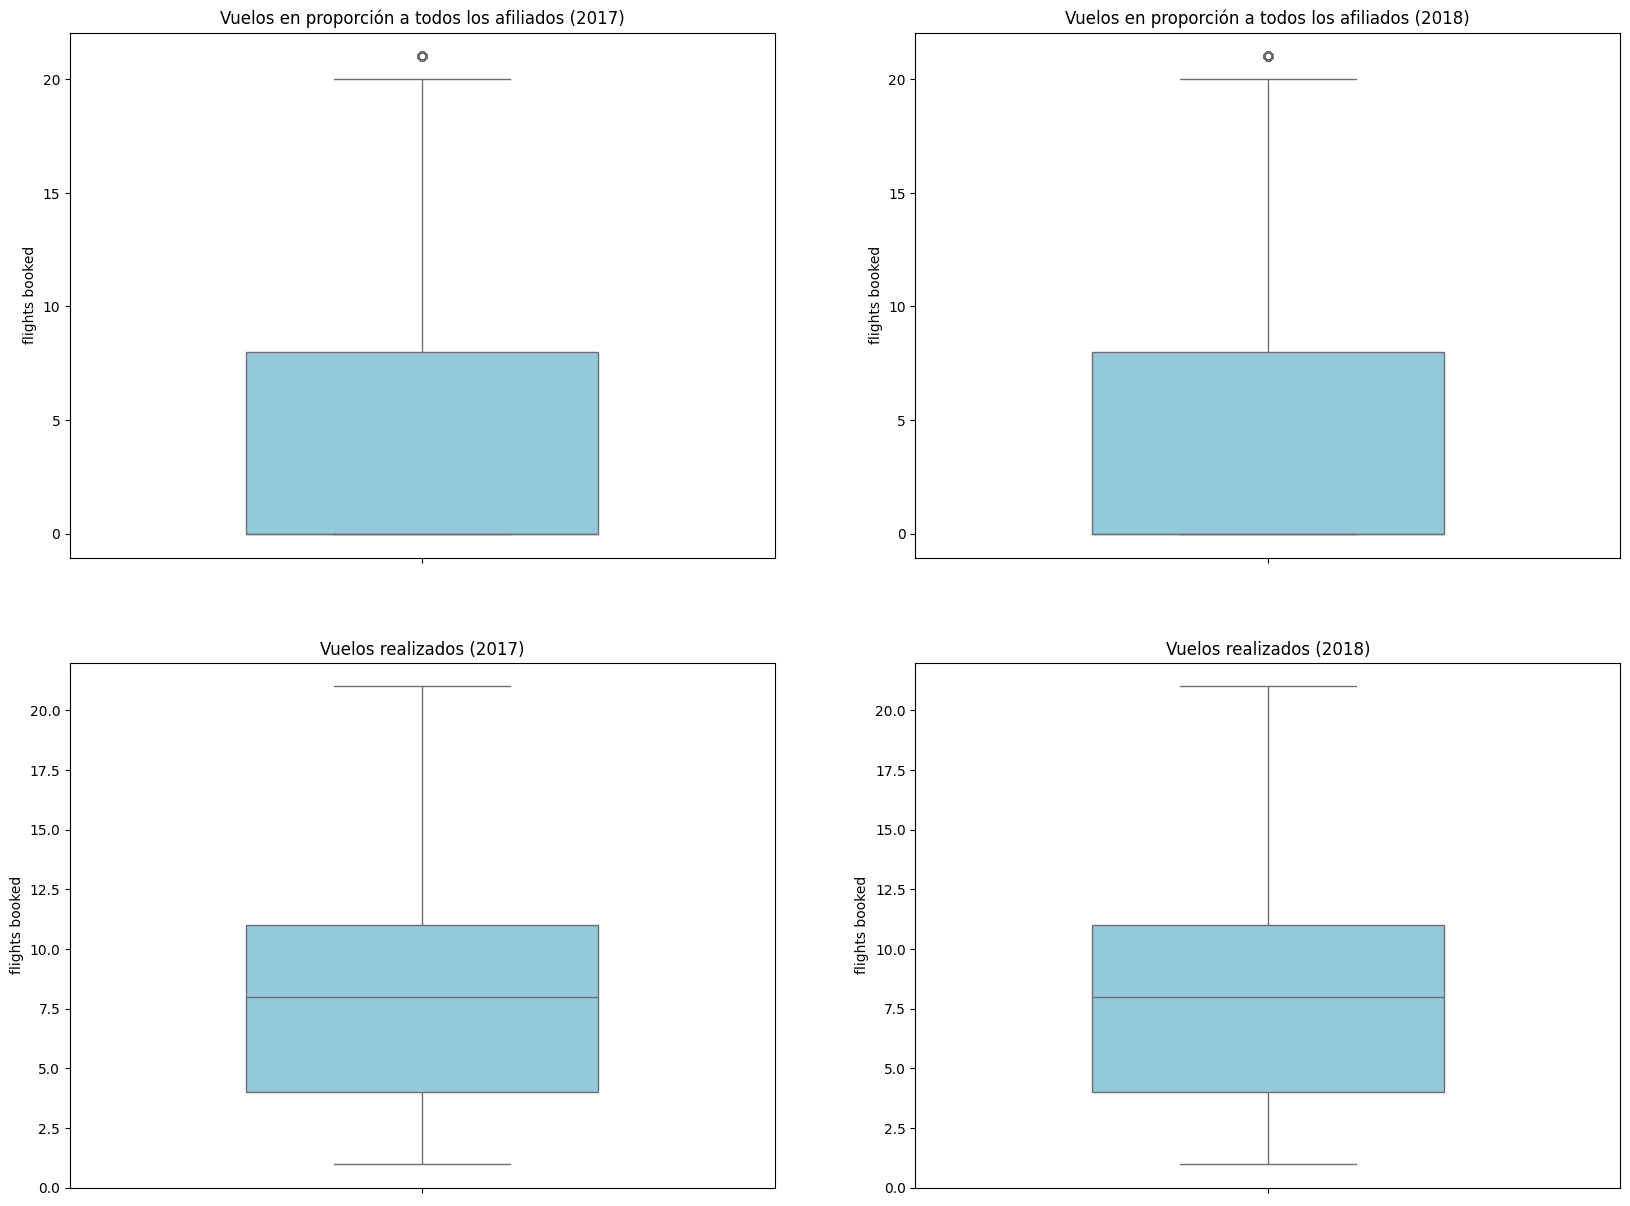

In [11]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))
sns.boxplot(y = "flights booked", 
            data = df[df['year']==2017], 
            width = 0.5,
            color='skyblue',
            ax=axes[0][0])

sns.boxplot(y = "flights booked", 
            data = df[df['year']==2017], 
            width = 0.5,
            color='skyblue',
            ax=axes[0][1])

sns.boxplot(y = "flights booked", 
            data = df_booked[df_booked['year']==2017], 
            width = 0.5,
            color='skyblue',
            ax=axes[1][0])


sns.boxplot(y = "flights booked", 
            data = df_booked[df_booked['year']==2018], 
            width = 0.5,
            color='skyblue',
            ax=axes[1][1])

axes[0][0].set_title('Vuelos en proporción a todos los afiliados (2017)')
axes[0][1].set_title('Vuelos en proporción a todos los afiliados (2018)')
axes[1][0].set_title('Vuelos realizados (2017)')
axes[1][1].set_title('Vuelos realizados (2018)')

In [ ]:
print('Media y mediana de vuelos reservados por cliente')
display(df.pivot_table(index='year', values='flights booked', aggfunc=['mean', 'median']))
print('Media y mediana de vuelos reservados:')
display(df_booked.pivot_table(index='year', values='flights booked', aggfunc=['mean', 'median']))

Media y mediana de vuelos reservados por cliente


,mean,median
,flights booked,flights booked
year,,
2017,3.903364,0.0
2018,4.364616,2.0


Media y mediana de vuelos reservados:


,mean,median
,flights booked,flights booked
year,,
2017,8.178334,8.0
2018,7.918666,8.0


> Una gran cantidad de clientes no realizaron vuelos. Si no tenemos en cuenta aquellos que no reservaron ningún vuelo (df_booked), vemos que la media de vuelos comprados es en torno a 8 ambos años. Las medianas no distan mucho de la media. Sin embargo, si tenemos en consideración a todos los clientes afiliados a la aerolínea, vemos que la media es de 3.91, con una mediana de 0 en 2017, y una media de 4.36 y una mediana de 2 en 2018. 

> Aunque en cuanto a reservas ambos años son similares, si pensamos en la relación entre el número de clientes y los vuelos que se han reservado, apreciamos un crecimiento en 2018 (la media es más baja porque vuelan más clientes)

2. Vuelos reservados según grupo académico

In [17]:
df.groupby('education')['flights booked'].agg(['median','mean','std'])

,median,mean,std
education,,,
bachelor,1.0,4.110288,5.221671
college,1.0,4.169744,5.246040
doctor,1.0,4.175512,5.256971
high school or below,1.0,4.178445,5.240179
master,1.0,4.200700,5.213956


In [18]:
df_booked.groupby('education')['flights booked'].agg(['median','mean','std'])

,median,mean,std
education,,,
bachelor,8.0,8.028607,4.669000
college,8.0,8.070523,4.667465
doctor,8.0,8.053519,4.697898
high school or below,8.0,8.016147,4.681404
master,8.0,8.005894,4.620198


Text(0.5, 1.0, 'Vuelos por grado educativo (total de vuelos)')

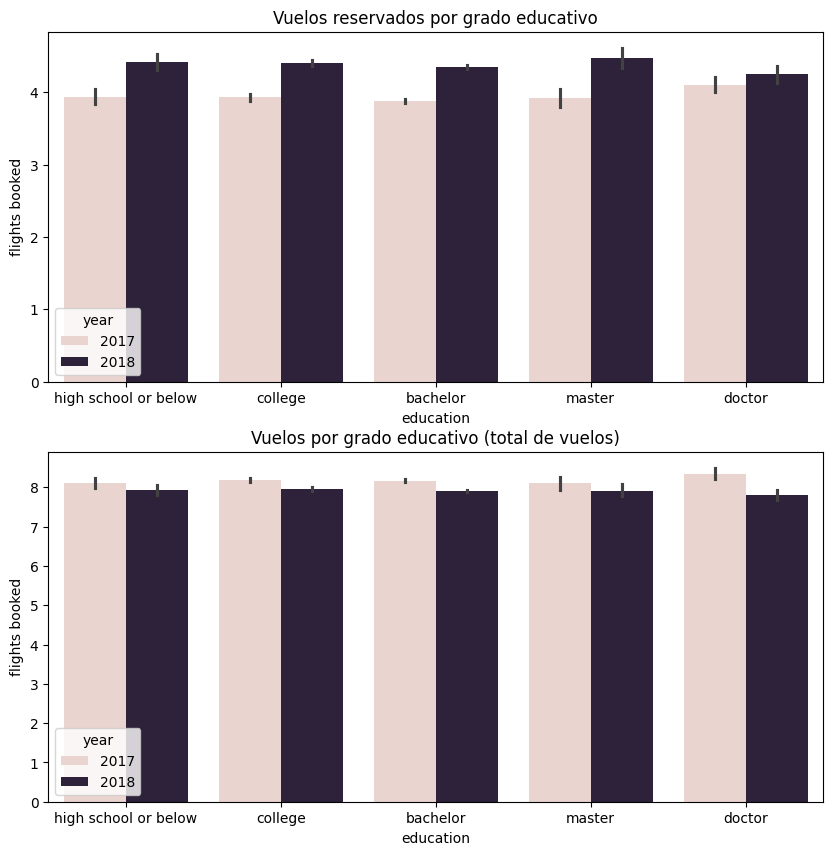

In [30]:
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (10, 10))

sns.barplot(x='education',
            y='flights booked',
            data=df,
            hue='year',
            order=['high school or below', 'college', 'bachelor', 'master', 'doctor'],
            ax=axes[0])
sns.barplot(x='education',
            y='flights booked',
            data=df_booked,
            hue='year',
            order=['high school or below', 'college', 'bachelor', 'master', 'doctor'],
            ax=axes[1])

axes[0].set_title('Vuelos reservados por grado educativo')
axes[1].set_title('Vuelos por grado educativo (total de vuelos)')
